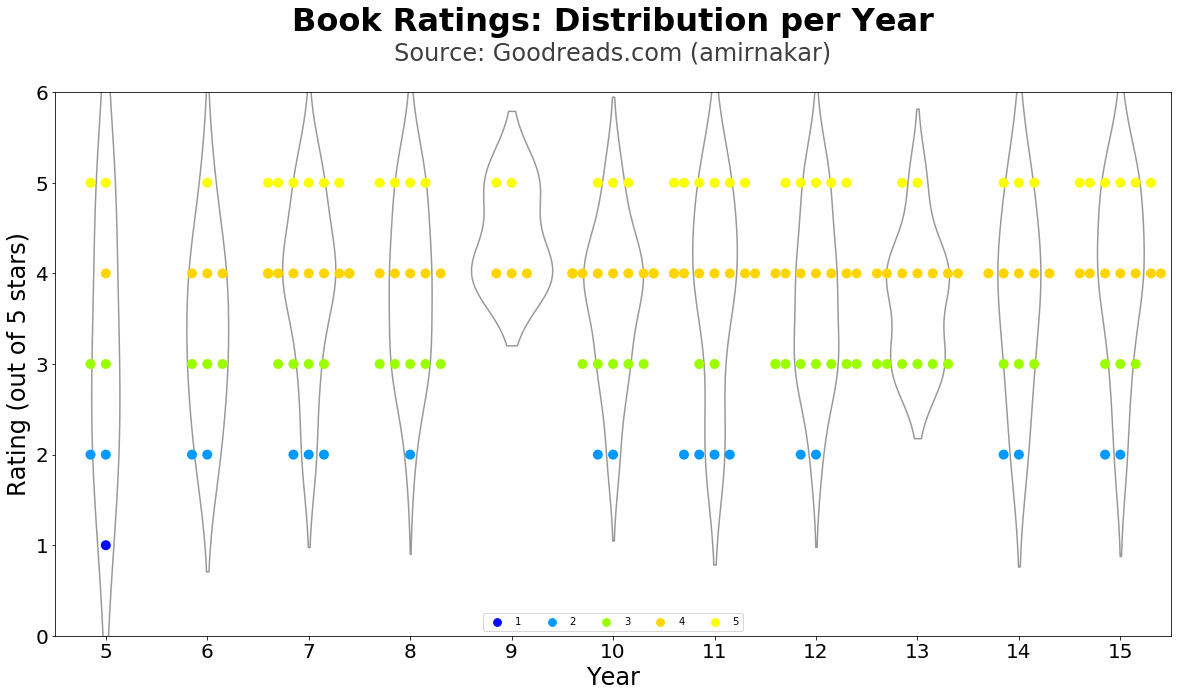

In [2]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
###

# Import and clead dataset
url = "https://raw.githubusercontent.com/amirnakar/scratchboard/master/Goodreads/goodreads_library_export.csv"
Books = pd.read_csv(url)
Books = Books[Books['Date Read'].notna()]   # Remove NA

Books['Year'] = pd.to_datetime(             # Convert to dates
    Books['Date Read'],
    format='%YYYY%mm%dd', 
    errors='coerce')

Books['Year'] = pd.DatetimeIndex(Books['Date Read']).year # Take only years
Books[['Year', 'Date Read']]                 # merge the years in
###

# Calculate mean rate by year
RateMeans = (Books["My Rating"].groupby(Books["Year"]).mean())
Years = list(RateMeans.index.values)
Rates = list(RateMeans)
RateMeans = pd.DataFrame(
    {'Years': Years,
     'Rates': Rates
    })
###

# Plot
fig,ax = plt.subplots(figsize=(20,10))

## Violin Plot:
plot = sns.violinplot(
    data=Books, 
    x = "Year", 
    y = 'My Rating', 
    ax=ax,
    color = "white", 
    inner=None,
    #palette=colors_from_values(ArrayRates[:,1], "Blues")
    )

## Swarm Plot
plot = sns.swarmplot(
    data=Books, 
    x = "Year", 
    y = 'My Rating', 
    ax=ax,
    hue = "My Rating",
    size = 10
    )
    
## Style
    
### Title
ax.text(x=0.5, y=1.1, s='Book Ratings: Distribution per Year', fontsize=32, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Source: Goodreads.com (amirnakar)', fontsize=24, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)



### Axis
ax.set(xlim=(4.5, None), ylim=(0,6))
#ax.set_title('Book Ratings: Distribution per Year \n', fontsize = 32)
ax.set_ylabel('Rating (out of 5 stars)', fontsize = 24)
ax.set_xlabel('Year', fontsize = 24)
ax.set_yticklabels(ax.get_yticks().astype(int), size=20)
ax.set_xticklabels(ax.get_xticks(), size=20)

### Legend
plot.legend(loc="lower center", ncol = 5 )

### Colour pallete
colorset = ["#FAFF04", "#FFD500", "#9BFF00", "#0099FF", "#000BFF"]
colorset.reverse()
sns.set_palette(sns.color_palette(colorset))


# Save the plot
#plt.show(plot)
plt.savefig("Rate-Python.svg", format="svg")
